# Exploratory Data Analysis on the Dataset
### Overview: Data distribution of train/val/test

In [59]:
%matplotlib inline
import os
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

In [60]:
DATA_DIR = "/srv/scratch/jesikmin"

#### 1) Data distribution over train and validation dataset

In [61]:
f = open(os.path.join(DATA_DIR, "_shuffled_train_val"), 'r')
lines = list(f)
train_val_len = len(lines)
train_len = int(train_val_len * 0.75)
val_len = int(train_val_len * 0.25)
print "Train: {}, Val: {}".format(train_len, val_len)
f.close()

Train: 106855, Val: 35618


In [62]:
chroms = ['chr1', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10']

In [63]:
train_cnt_dict = defaultdict(int)
for train_idx in range(train_len):
    train_cnt_dict[lines[train_idx].split("\t")[0]] += 1
train_ratio = dict(zip(train_cnt_dict.keys(), np.array(train_cnt_dict.values())*1.0/sum(train_cnt_dict.values())))
print train_ratio
train_values = []
for key in chroms:
    train_values.append(train_ratio[key])
print train_values

{'chr7': 0.10094988535866362, 'chr6': 0.11697159702400449, 'chr5': 0.11243273595058724, 'chr4': 0.10990594731177765, 'chr3': 0.1302138411866548, 'chr1': 0.1746291703710636, 'chr9': 0.077207430630293394, 'chr8': 0.08654719011744888, 'chr10': 0.091142202049506335}
[0.1746291703710636, 0.1302138411866548, 0.10990594731177765, 0.11243273595058724, 0.11697159702400449, 0.10094988535866362, 0.08654719011744888, 0.077207430630293394, 0.091142202049506335]


In [64]:
val_cnt_dict = defaultdict(int)
for val_idx in range(train_len, train_len+val_len):
    val_cnt_dict[lines[val_idx].split("\t")[0]] += 1
val_ratio = dict(zip(val_cnt_dict.keys(), np.array(val_cnt_dict.values())*1.0/sum(val_cnt_dict.values())))
print val_ratio
val_values = []
for key in chroms:
    val_values.append(val_ratio[key])
print val_values

{'chr7': 0.0992194957605705, 'chr6': 0.11746869560334662, 'chr5': 0.11185355719018474, 'chr4': 0.10943904767252513, 'chr3': 0.12951316749957886, 'chr1': 0.17625919478915156, 'chr9': 0.077516985793699811, 'chr8': 0.087146948172272448, 'chr10': 0.091582907518670334}
[0.17625919478915156, 0.12951316749957886, 0.10943904767252513, 0.11185355719018474, 0.11746869560334662, 0.0992194957605705, 0.087146948172272448, 0.077516985793699811, 0.091582907518670334]


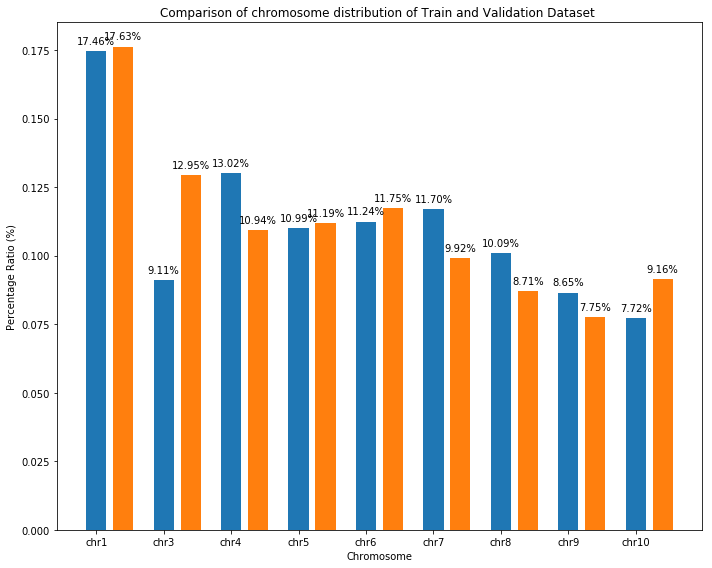

In [65]:
# Plot the figure.
width = 0.3  
fig, ax = plt.subplots(figsize=(10,8))
ax.bar(chroms, train_values, width)
ax.bar(np.arange(len(chroms)) + width + 0.1, val_values, width)
ax.set_title('Comparison of chromosome distribution of Train and Validation Dataset ')
ax.set_xlabel('Chromosome')
ax.set_ylabel('Percentage Ratio (%)')
ax.set_xticklabels(chroms)

rects = ax.patches

# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2

    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    va = 'bottom'

    # If value of bar is negative: Place label below bar
    if y_value < 0:
        # Invert space to place label below
        space *= -1
        # Vertically align label at top
        va = 'top'

    # Use Y value as label and format number with one decimal place
    label = "{:.2f}%".format(y_value*100)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(0, space),          # Vertically shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        ha='center',                # Horizontally center label
        va=va)                      # Vertically align label differently for
                                    # positive and negative values.
plt.tight_layout()

In [66]:
f = open(os.path.join(DATA_DIR, "test_interval"), 'r')
lines = list(f)
test_len = len(lines)
print "Test: {}".format(test_len)
f.close()

Test: 37068


In [70]:
chroms = ['chr1', 'chr11']
test_cnt_dict = defaultdict(int)
for test_idx in range(test_len):
    test_cnt_dict[lines[test_idx].split("\t")[0]] += 1
test_ratio = dict(zip(chroms, np.array(test_cnt_dict.values())*1.0/sum(test_cnt_dict.values())))
print test_ratio
test_values = []
for key in chroms:
    test_values.append(test_ratio[key])
print test_values

{'chr11': 0.61629977338944641, 'chr1': 0.38370022661055359}
[0.38370022661055359, 0.61629977338944641]


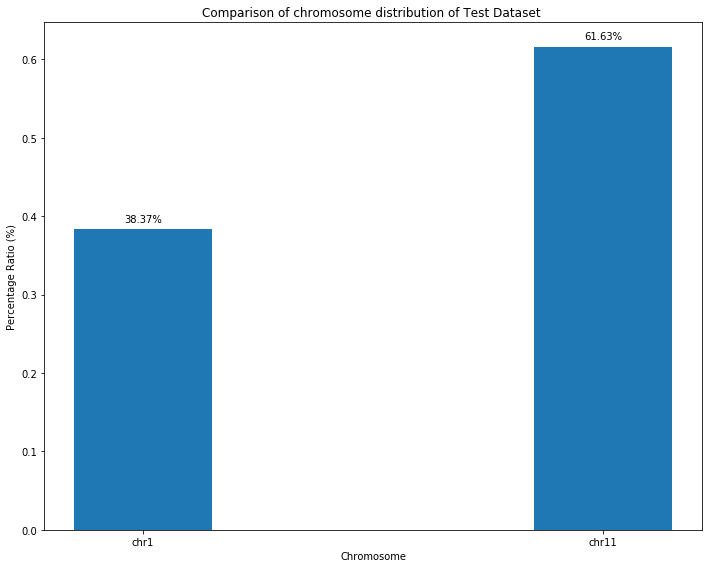

In [71]:
# Plot the figure.
width = 0.3  
fig, ax = plt.subplots(figsize=(10,8))
ax.bar(chroms, test_values, width)
ax.set_title('Comparison of chromosome distribution of Test Dataset ')
ax.set_xlabel('Chromosome')
ax.set_ylabel('Percentage Ratio (%)')
ax.set_xticklabels(chroms)

rects = ax.patches

# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2

    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    va = 'bottom'

    # If value of bar is negative: Place label below bar
    if y_value < 0:
        # Invert space to place label below
        space *= -1
        # Vertically align label at top
        va = 'top'

    # Use Y value as label and format number with one decimal place
    label = "{:.2f}%".format(y_value*100)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(0, space),          # Vertically shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        ha='center',                # Horizontally center label
        va=va)                      # Vertically align label differently for
                                    # positive and negative values.
plt.tight_layout()